In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.spatial.distance


plt.set_cmap('gray')

In [2]:
np.random.seed(1337)

# load dataset

In [3]:
train = tf.keras.datasets.mnist.load_data()[0]
X_train, Y_train = train[0], train[1]

n = X_train.shape[0]
m = X_train.shape[1]**2

X_train = X_train.reshape([n, m])

# take subsample

In [4]:
n_sample = 1000
idx = np.random.randint(n, size=n_sample)
x_sample = X_train[idx]
y_sample = Y_train[idx]

k = 10

# explore

In [7]:
_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embedding = _tsne.fit_transform(x_sample)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.069s...
[t-SNE] Computed neighbors for 1000 samples in 2.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 575.587716
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.127350
[t-SNE] KL divergence after 300 iterations: 1.291911


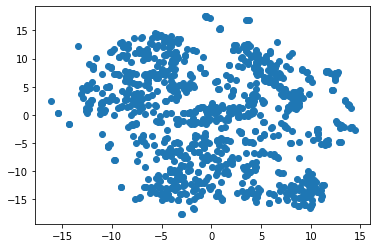

In [8]:
color_map = sns.color_palette("Set2", k)
plt.scatter(embedding[:, 0], embedding[:, 1])

# algorithm

In [9]:
# init centroids
idx_centroid = np.random.randint(n_sample, size=k)
centroids = x_sample[idx_centroid]

idx_centroid

array([452, 516, 541, 622, 836, 593, 410, 646, 483, 421])

In [10]:
# calc distances
dists = scipy.spatial.distance.cdist(x_sample, centroids, metric='euclid')
dists.shape

(1000, 10)

In [11]:
# find nearest centroids
labels = np.argmin(dists, axis=1)

In [12]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
for i in range(k):
    print('group', i, x_sample[labels == i].shape)

group 0 (113, 784)
group 1 (78, 784)
group 2 (206, 784)
group 3 (69, 784)
group 4 (154, 784)
group 5 (112, 784)
group 6 (99, 784)
group 7 (54, 784)
group 8 (29, 784)
group 9 (86, 784)


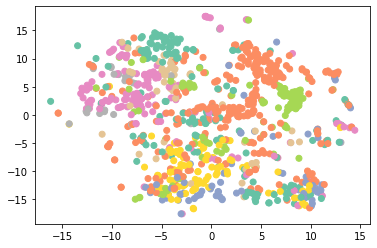

In [14]:
colors = [color_map[l-1] for l in labels]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)

In [15]:
x_sample[labels == 0].mean(0).shape

(784,)

In [16]:
# get new centroids
centroid_list = [x_sample[labels == i].mean(0) for i in range(k)]
centroids = np.stack(centroid_list)

In [17]:
centroids.shape

(10, 784)

In [18]:
# init centroids

for j in range(1000):
    
    # calc distances
    dists = scipy.spatial.distance.cdist(x_sample, centroids, metric='euclid')
    
    # label according to nearest centroids
    labels = np.argmin(dists, axis=1)
    
    # get new centroids
    centroid_list = [x_sample[labels == i].mean(0) for i in range(k)]
    centroids = np.stack(centroid_list)


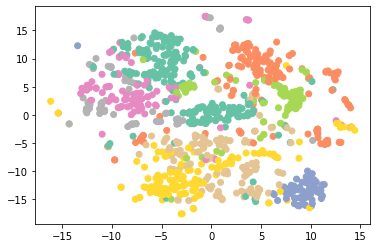

In [19]:
colors = [color_map[l-1] for l in labels]
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)

In [20]:
cluster_0 = x_sample[labels == 0]

In [21]:
cluster_0.shape

(67, 784)

In [22]:
y_sample[labels == 0]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=uint8)

In [23]:
y_sample[labels == 1]


array([6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 3, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 3, 6, 6, 6, 2, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 9, 6, 6, 6, 6, 6, 2,
       6, 6], dtype=uint8)

In [24]:
y_sample[labels == 2]


array([1, 1, 8, 5, 1, 1, 1, 1, 1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 3, 1, 5, 4, 1, 1, 1, 1, 1, 6, 1, 8, 6, 5, 1, 1, 1, 2, 1, 8,
       1, 1, 4, 8, 1, 6, 1, 1, 1, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 7, 1, 1, 1, 1, 3, 5, 1, 1, 2, 1, 6, 6, 1, 2, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 5, 8, 1, 1, 1, 1], dtype=uint8)

In [25]:
y_sample[labels == 3]


array([0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [26]:
y_sample[labels == 4]


array([9, 9, 7, 4, 7, 9, 4, 9, 7, 2, 4, 4, 4, 8, 4, 7, 7, 4, 9, 4, 4, 9,
       3, 7, 4, 9, 4, 9, 4, 7, 8, 9, 7, 7, 9, 9, 9, 9, 9, 4, 5, 9, 7, 7,
       5, 4, 9, 9, 9, 4, 4, 4, 7, 9, 8, 4, 7, 9, 7, 9, 4, 7, 4, 7, 9, 4,
       9, 9, 5, 4, 9, 9, 4, 7, 3, 7, 7, 7, 4, 4, 4, 7, 7, 4, 4, 7, 7, 7,
       4, 9, 9, 9, 9, 9, 9, 4, 7, 9, 8, 9, 4, 9, 9, 7, 7, 7, 7, 9, 7],
      dtype=uint8)

In [27]:
y_sample[labels == 5]


array([1, 1, 1, 7, 1, 5, 5, 9, 1, 1, 9, 3, 4, 1, 5, 1, 9, 1, 7, 4, 2, 3,
       9, 1, 8, 1, 1, 5, 1, 4, 1, 1, 5, 1, 1, 1, 7, 1, 6, 1, 9, 8, 1, 2,
       1, 9, 4, 1, 1, 6, 1, 7, 1, 2, 1, 2, 1, 5, 9, 4, 1, 1, 1, 1, 5, 1,
       1, 4, 2, 1, 5, 1, 1, 1, 8, 4, 6, 1, 5, 1, 1, 4, 2, 1, 1, 1, 5, 4,
       7, 1, 1, 1, 1], dtype=uint8)